## Problem Scenario:

In this project we have a dataset containing stock prices of Google from May-2009 to August-2018. We have both AMD and Google datasets. We are using only Google data as of now. 

Dataset Source: https://www.kaggle.com/gunhee/amdgoogle

We are using the stock prices data from 2009 to 2017 (9 years) for training the neural network and predict the stock prices for the year 2018. This is a Regression problem.

To achieve this goal, we will train a **Recurrent Neural Network (LSTM)**. We will use one of the deep learning libraries, **Keras**, to build the neural network.


## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

import datetime

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams

In [2]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# !pip install keras
# !pip install tensorflow

## Loading the dataset

In [4]:
df = pd.read_csv("dataset/GOOGL.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2330,2018-08-23,1219.880005,1235.170044,1219.349976,1221.160034,1221.160034,1233300
2331,2018-08-24,1226.000000,1237.400024,1221.420044,1236.750000,1236.750000,1222700
2332,2018-08-27,1244.140015,1257.869995,1240.680054,1256.270020,1256.270020,1429000
2333,2018-08-28,1255.900024,1256.560059,1242.969971,1245.859985,1245.859985,1366500
2334,2018-08-29,1255.000000,1267.170044,1252.800049,1264.650024,1264.650024,1846300


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 7 columns):
Date         2335 non-null object
Open         2335 non-null float64
High         2335 non-null float64
Low          2335 non-null float64
Close        2335 non-null float64
Adj Close    2335 non-null float64
Volume       2335 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 127.8+ KB


In [8]:
# dataframe.size 
print("Size = ", df.size)

# dataframe.shape 
shape = df.shape 
print("Shape = ", shape)
print("Shape[0] x Shape[1] = {}".format(shape[0]*shape[1])) 

Size =  16345
Shape =  (2335, 7)
Shape[0] x Shape[1] = 16345


## Exploratory Data Analysis

In [9]:
df.dataframeName = 'GOOGL.csv'
nRow, nCol = df.shape
print('There are',nRow,'rows and',nCol,'columns')

There are 2335 rows and 7 columns


Let's take a quick look at what the data looks like

In [10]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [11]:
#statistical summary of the attributes

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2.335000e+03
mean,550.725409,555.136744,545.908515,550.662757,550.662757,3.764886e+06
std,278.136894,280.349025,275.855161,278.228484,278.228484,2.764696e+06
min,196.171173,199.524521,195.195190,196.946945,196.946945,5.206000e+05
25%,299.286773,301.759247,297.197204,299.144135,299.144135,1.734650e+06
50%,526.211182,532.780029,521.909973,527.767761,527.767761,3.250200e+06
75%,757.760010,763.745025,752.024994,758.524993,758.524993,4.891800e+06
max,1289.119995,1291.439941,1263.000000,1285.500000,1285.500000,2.961990e+07


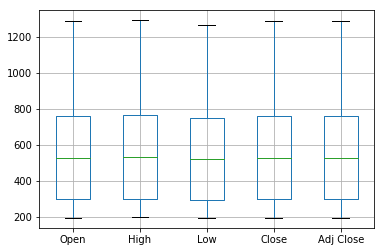

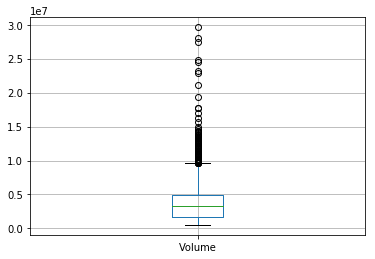

In [12]:
# boxplots

df.iloc[:,0:6].boxplot()
plt.show()

df.iloc[:,6:7].boxplot()
plt.show()

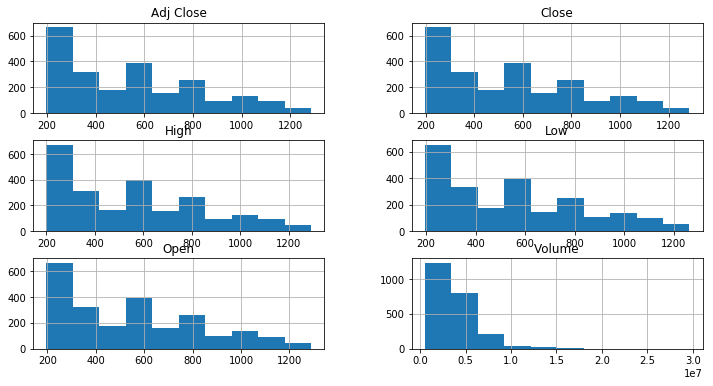

In [13]:
df.hist(figsize=(12, 6))
plt.show()

In [14]:
# Correlation Matrix

df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999879,0.999815,0.999687,0.999687,-0.573989
High,0.999879,1.000000,0.999805,0.999844,0.999844,-0.572042
Low,0.999815,0.999805,1.000000,0.999874,0.999874,-0.577802
Close,0.999687,0.999844,0.999874,1.000000,1.000000,-0.575422
Adj Close,0.999687,0.999844,0.999874,1.000000,1.000000,-0.575422
Volume,-0.573989,-0.572042,-0.577802,-0.575422,-0.575422,1.000000


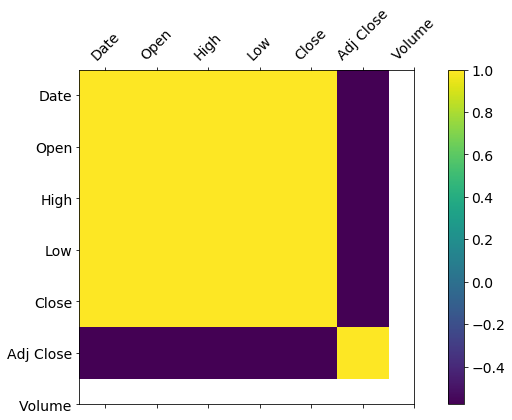

In [15]:
# Correlation Matrix Plot

f = plt.figure(figsize=(12, 6))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [16]:
# Correlation heatmap

rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Open,High,Low,Close,Adj Close,Volume
Open,1,1,1,1,1,-0.57
High,1,1,1,1,1,-0.57
Low,1,1,1,1,1,-0.58
Close,1,1,1,1,1,-0.58
Adj Close,1,1,1,1,1,-0.58
Volume,-0.57,-0.57,-0.58,-0.58,-0.58,1


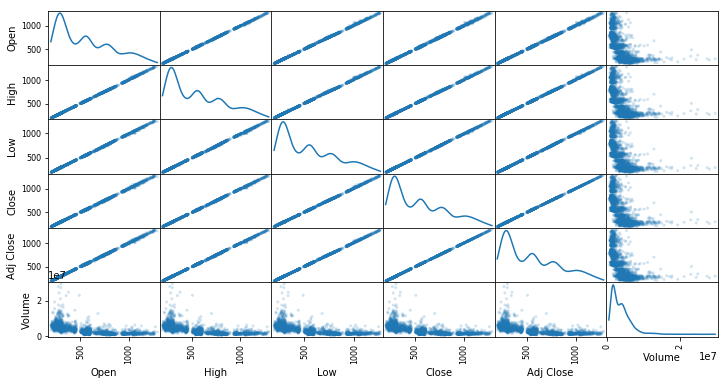

In [17]:
# Attribute Scatter Plot Matrix

from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(12, 6), diagonal='kde', alpha=0.2)
plt.show()

## Splitting the Data

You can see that we have the dataset over the years from 2009 to 2018. We planned to train the model over the data from 2009 to 2017 and test it on 2018 data. So, we need to filter the data into two parts.

- data_from_2009_to_2017 (starting from May 2009 to December 2017 included)
- data_2018 (starting from January 2018 to August 2018)

In [18]:
# converting the Date row of the Dataframe to datetime format for easy handling

import datetime
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
# the seperation date

dec_2017 = '2017-12-31'

### data_from_2009_to_2017

In [20]:
mask = (df['Date'] <= dec_2017)
data_09to17 = df.loc[mask]

In [21]:
data_09to17.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2163,2017-12-22,1070.000000,1071.719971,1067.640015,1068.859985,1068.859985,889400
2164,2017-12-26,1068.640015,1068.859985,1058.640015,1065.849976,1065.849976,918800
2165,2017-12-27,1066.599976,1068.270020,1058.380005,1060.199951,1060.199951,1116200
2166,2017-12-28,1062.250000,1064.839966,1053.380005,1055.949951,1055.949951,994200
2167,2017-12-29,1055.489990,1058.050049,1052.699951,1053.400024,1053.400024,1180300


### data_2018

In [22]:
mask = (df['Date'] > dec_2017)
data_18 = df.loc[mask]

In [23]:
data_18.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2168,2018-01-02,1053.020020,1075.979980,1053.020020,1073.209961,1073.209961,1588300
2169,2018-01-03,1073.930054,1096.099976,1073.430054,1091.520020,1091.520020,1565900
2170,2018-01-04,1097.089966,1104.079956,1094.260010,1095.760010,1095.760010,1302600
2171,2018-01-05,1103.449951,1113.579956,1101.800049,1110.290039,1110.290039,1512500
2172,2018-01-08,1111.000000,1119.160034,1110.000000,1114.209961,1114.209961,1232200


We will use the `data_09to17` for the further steps. We will use the `data_18` in the end for testing and validating.

## Data Preprocessing

The dataset contains various information like displayed above. But in this project we will only use the `Open` stock prices for training our model. Therefore for the purpose of convenience we will create another variable that stores only the required (`Open` stock price) information. 

In [24]:
training_set = data_09to17.iloc[:,1:2].values

print(training_set)
print("********************")
print("********************")
print(training_set.shape)

[[ 198.528534]
 [ 196.171173]
 [ 203.023026]
 ...
 [1066.599976]
 [1062.25    ]
 [1055.48999 ]]
********************
********************
(2168, 1)


Now we can see that there is only one column with the `Open` stock prices. There are a total of 2168 stock prices.

### Additional Information (Things to Remember!)

In [25]:
print(type(data_09to17))
print(type(data_09to17.iloc[:,1:2]))   
print(type(data_09to17.iloc[:,1:2].values))

# iloc[rangeofRows, rangeofColumns]
# Indexing starts from zero.
# ":" indicates entire range.
# "1:2" indicates column one only. Because, the upper bound will be excluded. 
# mathematical operation are performed on the arrays. So, it is crusial to convert the data to arrays.

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


## Feature scaling

The performance of the neural network will be better if the entire training input is in the same range. As we can see from above the stock prices are not in the same range. So, we need to scale the training data such that they are in the same range. This process is called Feature Scaling. The two popular methods for feature scaling are:

* **Standardization**

$ x' = \frac{x - \bar{x}}{\sigma} $

where $ x $ is the original feature vector, $ \bar{x} $ is the mean of that feature vector, and $ \sigma $ is its standard deviation.

* **Normalization** (Min-Max normalization)

$ x' = \frac{x - \text{min}(x)}{\text{max}(x)-\text{min}(x)} $

where $ x $ is an original value, $ x' $ is the normalized value.

It is recommended to use Normalization in the case of RNN networks. Therefore we use Min-Max normalization here. You may also experiment with different feature scaling methods.

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1)) 
scaled_training_set = scaler.fit_transform(training_set)

print(scaled_training_set.shape)
scaled_training_set

(2168, 1)


array([[0.00265813],
       [0.        ],
       [0.00772607],
       ...,
       [0.98148496],
       [0.97657998],
       [0.96895747]])

The `fit` method only calculates the min and max values. It does not apply the formula on the training set. The `fit_transform` method applies the minmax formula on the training set. After applying the minmax formula, the transformed values will be in the range 0 and 1 i.e, the training data (features) will be in the range 0 and 1 (as shown above).

## Implementation of LSTM model

In [27]:
X_train = []
y_train = []

for i in range(60, 2168):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
    
X_train,y_train = np.array(X_train),np.array(y_train)

In [28]:
print(X_train.shape, y_train.shape)

(2108, 60) (2108,)


In [29]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(2108, 60, 1)

In [30]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [31]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [32]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 21s - loss: 0.0123
Epoch 2/20
 - 18s - loss: 0.0021
Epoch 3/20
 - 18s - loss: 0.0020
Epoch 4/20
 - 18s - loss: 0.0018
Epoch 5/20
 - 18s - loss: 0.0016
Epoch 6/20
 - 18s - loss: 0.0015
Epoch 7/20
 - 19s - loss: 0.0014
Epoch 8/20
 - 18s - loss: 0.0013
Epoch 9/20
 - 18s - loss: 0.0014
Epoch 10/20
 - 18s - loss: 0.0014
Epoch 11/20
 - 18s - loss: 0.0012
Epoch 12/20
 - 18s - loss: 0.0012
Epoch 13/20
 - 18s - loss: 0.0012
Epoch 14/20
 - 18s - loss: 0.0016
Epoch 15/20
 - 18s - loss: 0.0013
Epoch 16/20
 - 18s - loss: 0.0011
Epoch 17/20
 - 18s - loss: 0.0012
Epoch 18/20
 - 18s - loss: 0.0013
Epoch 19/20
 - 18s - loss: 0.0010
Epoch 20/20
 - 18s - loss: 0.0013


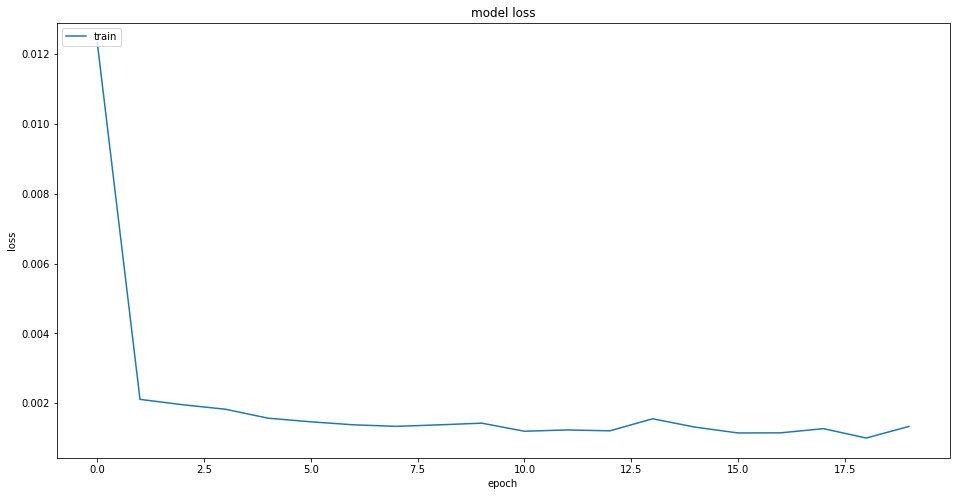

In [33]:
plt.figure(figsize = (16, 8))
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [34]:
testing_set = data_18.iloc[:,1:2]

In [35]:
y_test = testing_set.iloc[60:,0:].values

In [36]:
testing_set = testing_set.iloc[:,0:].values 
scaled_testing_set = scaler.transform(testing_set)
scaled_testing_set.shape

(167, 1)

In [37]:
X_test = []

for i in range(60, 167):
    X_test.append(scaled_testing_set[i-60:i,0])
    
X_test = np.array(X_test)

In [38]:
print(X_test.shape)

(107, 60)


In [39]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1)) #adding the batch_size axis
X_test.shape

(107, 60, 1)

In [40]:
y_pred = model.predict(X_test) #predicting the new values

In [41]:
predicted_price = scaler.inverse_transform(y_pred) #inversing the scaling transformation for ploting

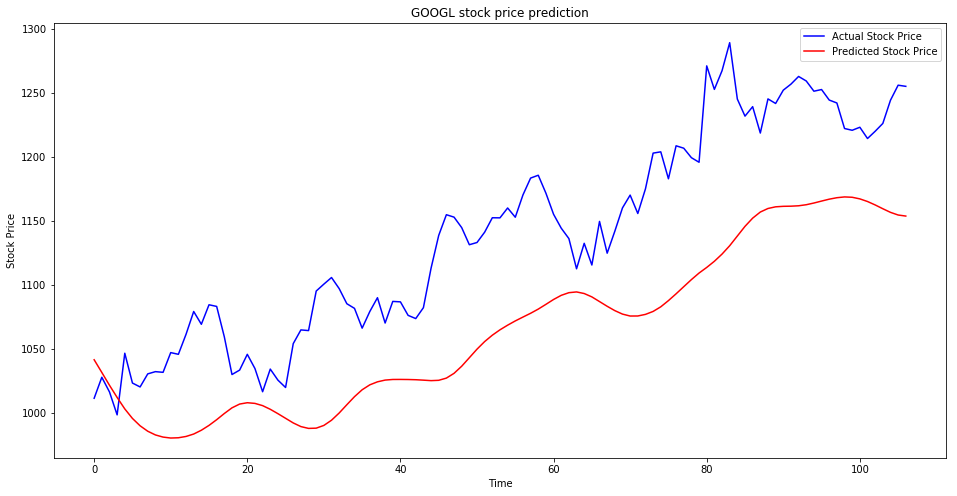

In [42]:
plt.figure(figsize = (16, 8))

plt.plot(y_test, color = 'blue', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('GOOGL stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Implementation of Autoregressive Integrated Moving Average (ARIMA)

An ARIMA model predicts the next step in the sequence with the help of a linear function of the differenced observations and residual errors at prior time steps. This combines the Auto Regressive model (which acts upon observations) and the Moving Average model (which acts upon residual errors) with a differnecing pre-processing step (called Integration). 

In [43]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

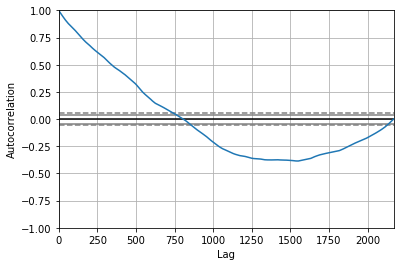

In [44]:
autocorrelation_plot(scaled_training_set)

In [45]:
'''

Based on the above correlation plot, there is a positive correlation with the first 750-to-780 lags that 
is perhaps significant for the first 2-3 lags.

'''

#let us define a model with lag value 3, difference order 2, and moving average 0
ARIMA_model = ARIMA(scaled_training_set, order=(3,1,0))
ARIMA_model_fit = ARIMA_model.fit(disp=0)
print(ARIMA_model_fit.summary())

/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1333: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1336: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1342: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2167
Model:                 ARIMA(3, 1, 0)   Log Likelihood                7245.129
Method:                       css-mle   S.D. of innovations              0.009
Date:                Tue, 22 Oct 2019   AIC                         -14480.258
Time:                        00:09:58   BIC                         -14451.852
Sample:                             1   HQIC                        -14469.870
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.415      0.016     8.4e-05       0.001
ar.L1.D.y      0.0057      0.021      0.266      0.790      -0.036       0.048
ar.L2.D.y     -0.0158      0.021     -0.734      0.4

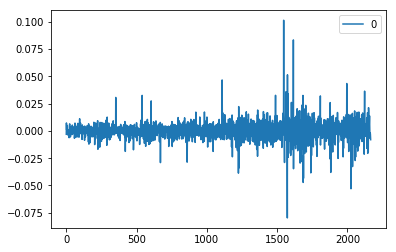

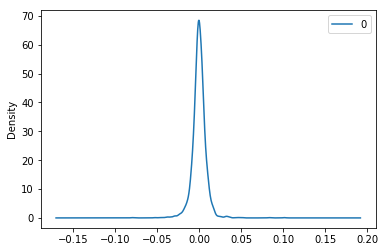

                  0
count  2.167000e+03
mean   4.667127e-09
std    8.547648e-03
min   -7.975511e-02
25%   -3.612661e-03
50%   -5.679374e-05
75%    3.896318e-03
max    1.014656e-01


In [46]:
residuals = pd.DataFrame(ARIMA_model_fit.resid)

residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
history = [x for x in training_set]
predictions = []

In [ ]:
for t in range(len(y_test)):
    ARIMA_model = ARIMA(history, order=(3,2,0))
    ARIMA_model_fit = ARIMA_model.fit(disp=0)
    output = ARIMA_model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = y_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1333: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1336: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1342: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

predicted=1051.754807, expected=1011.210022


/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=996.015668, expected=1027.619995
predicted=1018.061976, expected=1016.150024
predicted=1003.398266, expected=998.229980
predicted=986.039556, expected=1046.390015
predicted=1054.213046, expected=1023.099976
predicted=1021.972296, expected=1020.039978
predicted=1024.378010, expected=1030.260010
predicted=1034.272330, expected=1032.000000
predicted=1029.614080, expected=1031.469971
predicted=1034.299467, expected=1046.890015
predicted=1053.098283, expected=1045.550049
predicted=1049.313830, expected=1061.199951
predicted=1069.351695, expected=1079.010010
predicted=1089.980223, expected=1069.020020
predicted=1075.626054, expected=1084.270020
predicted=1093.956323, expected=1082.979980
predicted=1086.879161, expected=1059.199951
predicted=1055.827601, expected=1029.750000
predicted=1018.735315, expected=1033.219971
predicted=1019.079047, expected=1045.540039
predicted=1035.941909, expected=1034.420044
predicted=1030.059794, expected=1016.299988
predicted=1013.387160, expected=103

In [ ]:
plt.figure(figsize = (16, 8))
error = mean_squared_error(y_test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(y_test)
plt.plot(predictions, color='red')
plt.show()

## Implementation using Support Vector Regression